## 1. Importing required packages and loading the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### 1.1 Loading the data

In [3]:
df = pd.read_csv('data/exams.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## 2. Preprocessing the data

### 2.1 Preparing X and Y data

In [8]:
X = df.drop(columns=['math score'], axis=1)

In [9]:
y = df['math score']

### 2.2 Creating column transfers

In [10]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

### 2.3 Splitting the data into test and train sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(800, 19) (200, 19)


### 2.4 Evaluation function to account for metrics after training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4724
- Mean Absolute Error: 4.3923
- R2 Score: 0.8723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9771
- Mean Absolute Error: 4.0713
- R2 Score: 0.8878


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.7208
- Mean Absolute Error: 5.4576
- R2 Score: 0.8074
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8090
- Mean Absolute Error: 5.3757
- R2 Score: 0.7900


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4721
- Mean Absolute Error: 4.3883
- R2 Score: 0.8723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9874
- Mean Absolute Error: 4.0732
- R2 Score: 0.8873


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7228
- Mean Absolute Error: 4.5365
- R2 Score: 0.8604
-----------------------

## 3. Results

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.887794
2,Ridge,0.887328
7,CatBoosting Regressor,0.874470
5,Random Forest Regressor,0.855429
6,XGBRegressor,0.838367
8,AdaBoost Regressor,0.823572
3,K-Neighbors Regressor,0.810209
1,Lasso,0.789992
4,Decision Tree,0.744342


- Linear regression seems to have the best r2 score

## 4. Linear Regression Model

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.78


### 4.1 Plotting predicted and actual values

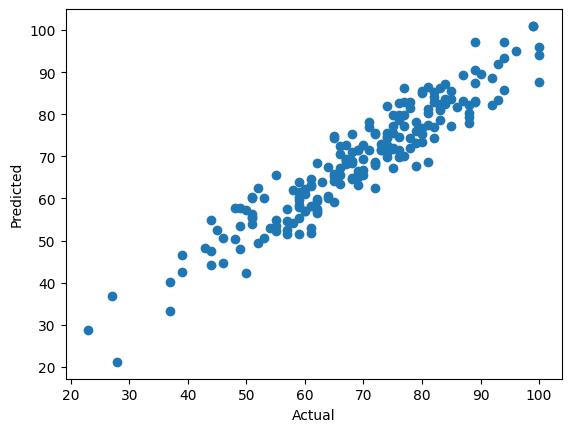

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

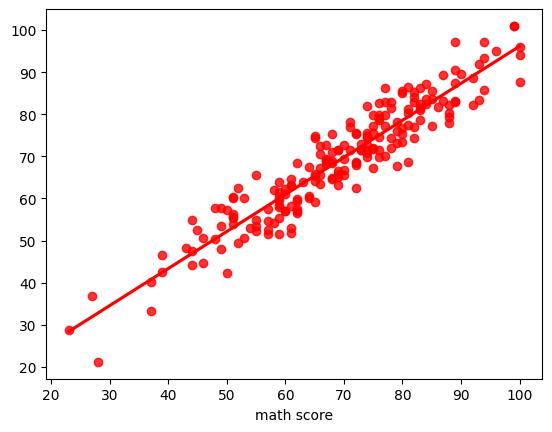

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,67,68.289062,-1.289062
737,78,81.398438,-3.398438
740,39,42.632812,-3.632812
660,70,69.265625,0.734375
411,90,89.609375,0.390625
...,...,...,...
408,100,87.710938,12.289062
332,66,70.515625,-4.515625
208,66,63.406250,2.593750
613,68,64.820312,3.179688
